## Наименьший общий предок.

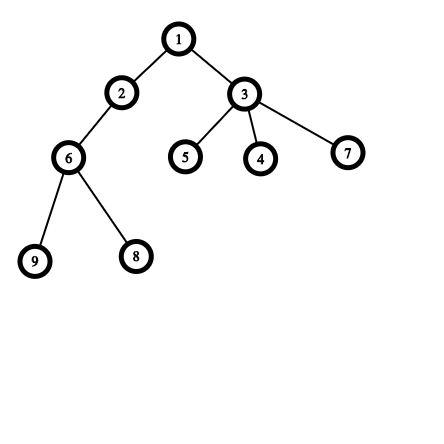

In [1]:
g = [[1, 2], [0, 5], [0, 3, 4, 6], [2], [2], [1, 7, 8], [2], [5], [5]]
n = len(g)
root = 0
p = [-1] * n
p[root] = 0


In [2]:
order = []


In [3]:
tin = [0] * n
tout = [0] * n


In [4]:
def dfs(v):
    tin[v] = len(order)
    order.append(v + 1)
    for to in g[v]:
        if to != p[v]:
            p[to] = v
            dfs(to)
    tout[v] = len(order) - 1

In [5]:
dfs(root)

In [6]:
print(order)
print(tin)
print(tout)


[1, 2, 6, 8, 9, 3, 4, 5, 7]
[0, 1, 5, 6, 7, 2, 8, 3, 4]
[8, 4, 8, 6, 7, 4, 8, 3, 4]


In [7]:
for v in range(n):
    print(f'subtree({v + 1}) = {order[tin[v]:tout[v] + 1]}')

subtree(1) = [1, 2, 6, 8, 9, 3, 4, 5, 7]
subtree(2) = [2, 6, 8, 9]
subtree(3) = [3, 4, 5, 7]
subtree(4) = [4]
subtree(5) = [5]
subtree(6) = [6, 8, 9]
subtree(7) = [7]
subtree(8) = [8]
subtree(9) = [9]


### Проверка того, что одна вершина является предком другой.

Если вершина $a$ является предком вершины $b$, то поддерево вершины $a$ содержит все вершины из поддерева $b$: $subtree(b) \subset subtree(a)$.

Поскольку поддерево любой вершины  𝑣  однозначно задается отрезком  $[𝑡𝑖𝑛[𝑣];𝑡𝑜𝑢𝑡[𝑣]]$ , то получаем простой критерий того, что вершина  𝑎  является предком  𝑏 :

+ $tin[a] \leq tin[b] \leq tout[b] \leq tout[a]$

In [10]:
def is_ancestor(a, b):
    return tin[a] <= tin[b] <= tout[b] <= tout[a]


In [11]:
for i in range(n):
    for j in range(n):
        print(1 if is_ancestor(i, j) else 0, end=' ')
    print()
    

1 1 1 1 1 1 1 1 1 
0 1 0 0 0 1 0 1 1 
0 0 1 1 1 0 1 0 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 1 1 
0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 


#### Определение:

+ **Наименьшим общим предком** ($least$ $common$ $ancestor$) двух вершин $a$ и $b$ называется такая вершина $c$, которая одновременно является и предком $a$, и предком $b$, а ее высота $h[c]$ - максимально возможная.

### Задание №10.

Постройте вручную табличку, в которую запишите значение наименьшего общего предка для каждой пары вершин  𝑎 ,  𝑏  нашего графа $g$.

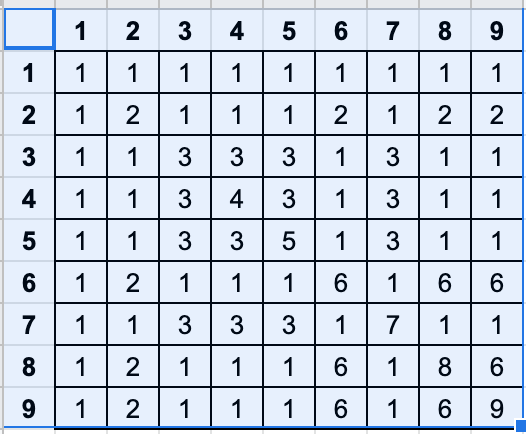

### Нахождение наименьшего общего предка.

Будем последовательно подниматься по предкам от вершины $a$ к корню до тех пор, пока не будет выполняться условие $is$_$ancestor(a, b)$ (сделать одну операцию подъема можно с помощью присвоения $a = p[a]$). Как только условие $is$_$ancestor(a, b)$ выполнится, в $a$ будет содержаться искомое значение наименьшего общего предка. Поскольку функция $is$_$ancestor$ работает за O(1), а максимальное кол-во подъемов будет $O(n)$, такой алгоритм будет работать за $O(n)$.


Реализовать функцию $lca(a, b)$ ($least$ $common$ $ancestor$), которая возвращает наименьшего общего предка двух вершин $a$ и $b$. Запустить ее на всех парах вершин $a$, $b$ и вывести результат. Убедиться, что результат совпадает с таблицей, выписанной в задании №$10$.


In [12]:
def lca(a, b):
    while not is_ancestor(a, b):
        a = p[a]
    return a

In [13]:
for i in range(9):
    for j in range(9):
        print(lca(i, j) + 1, end=' ')
    print()
        

1 1 1 1 1 1 1 1 1 
1 2 1 1 1 2 1 2 2 
1 1 3 3 3 1 3 1 1 
1 1 3 4 3 1 3 1 1 
1 1 3 3 5 1 3 1 1 
1 2 1 1 1 6 1 6 6 
1 1 3 3 3 1 7 1 1 
1 2 1 1 1 6 1 8 6 
1 2 1 1 1 6 1 6 9 


### Задание №12.

Сдать задачу acmp 0414 “Расследование”.

Сдать задачу codeforces “LCA начало”.  
<https://codeforces.com/gym/100091>


In [8]:
h, a, b = map(int, input().split())
print((h - a) // (a - b) + 1)


10 3 2
8
